In [18]:
from datetime import datetime
import pandas as pd
import requests

d = {'Accept': 'application/json, text/plain, */*',
 'Channel-Name': 'webpublic',
 'X-San-Segment-Id': '2'}
result = requests.get('https://www.santander.com.ar/fondosInformacion/funds?currency=ARS', headers=d).json()

data = result['data']

df = pd.read_excel(data['historyFile'])
df.columns = df.iloc[4]
df = df[5:]


df = df[df.FECHA > datetime(2024,1,1)]
df = df.set_index('FECHA')

## riesgo low

,Nombre,Variacion ultimo dia
1,Super Ahorro Plus,0.26%
0,Super Ahorro $,0.24%


## riesgo medium

,Nombre,Variacion ultimo dia
4,Superfondo Renta Fija,5.70%
2,Superfondo Renta $,4.65%
3,Super Bonos,2.45%
1,Superfondo Equilibrado,1.85%
0,Supergestión MIX VI,0.64%


## riesgo high

,Nombre,Variacion ultimo dia
0,Superfondo Acciones,7.57%
1,Superfondo Renta Variable,7.22%
3,Superfondo Acciones Brasil cuota C,6.06%
2,Superfondo Latinoamérica cuota C,5.84%
5,Supergestión,4.05%
6,Supergestión cuota C,4.05%
4,Superfondo Combinado,3.66%
7,Supergestión Balanceado,2.70%
8,Supergestión Balanceado cuota C,2.70%


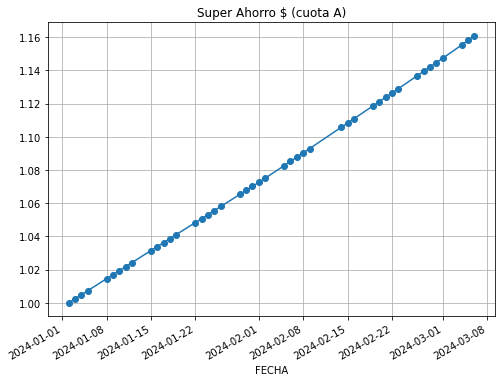

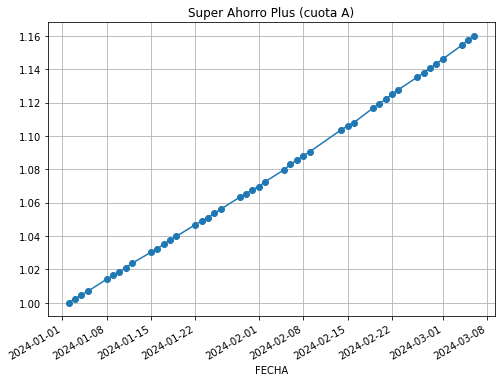

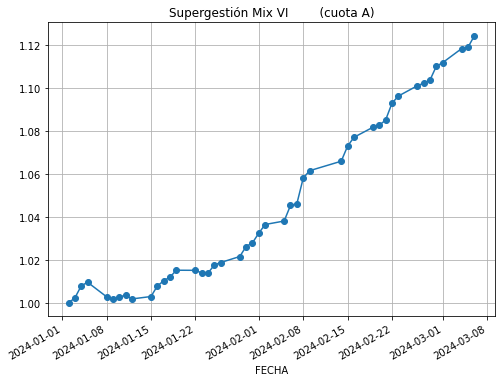

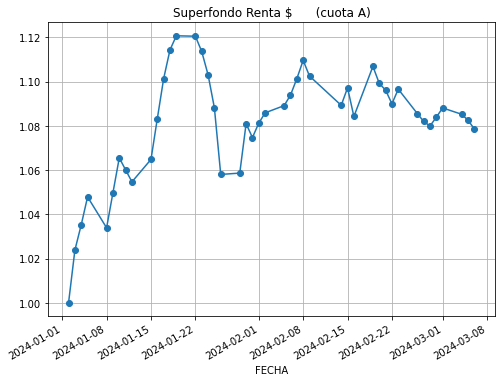

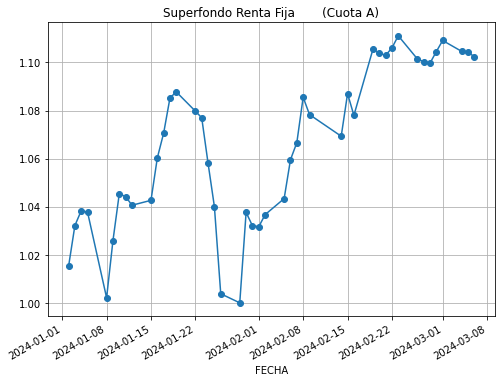

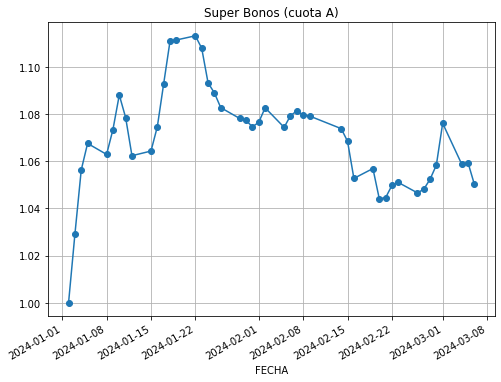

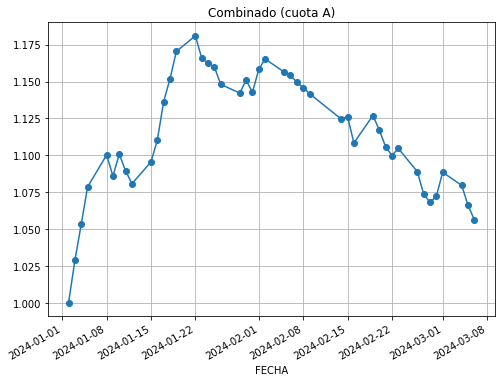

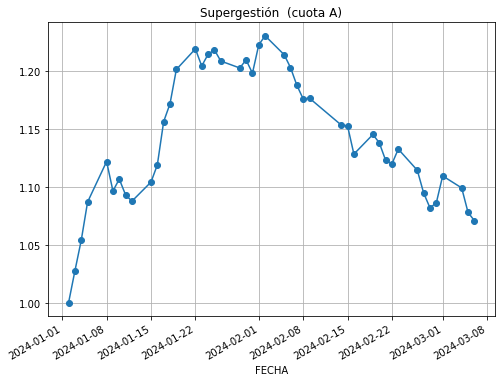

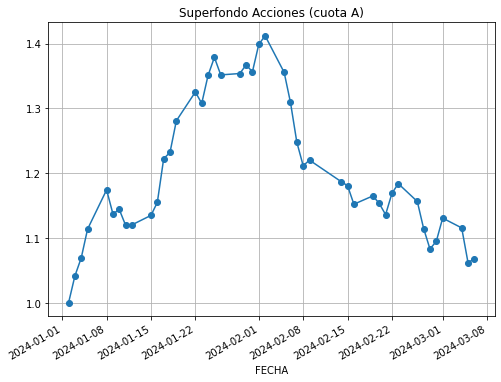

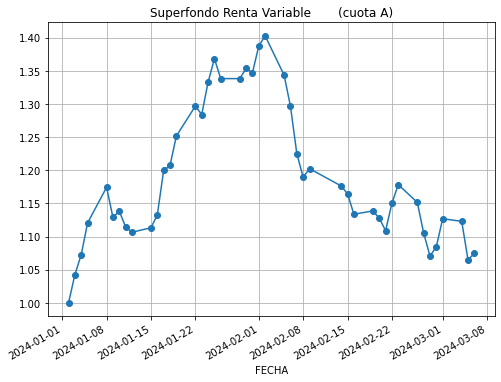

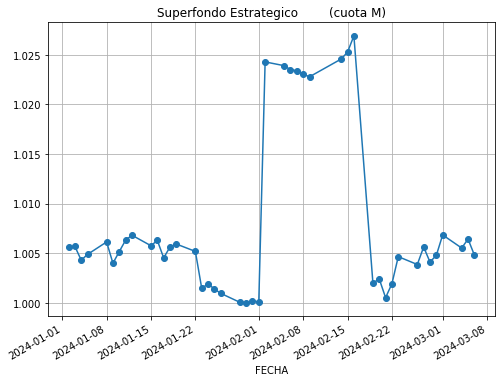

In [36]:
import matplotlib.pyplot as plt

from IPython.display import display_markdown, Markdown, display
from itertools import chain

for tier in data['fundsByRisk']:
    display_markdown(Markdown('## riesgo ' + tier['risk']))
    display(pd.DataFrame(
        [{'Nombre': e['name'], 'Variacion ultimo dia': e['periods']['lastDay']} for e in tier['funds']]
    ).sort_values('Variacion ultimo dia', ascending=False))
    

for c in df.columns:
    plt.figure(figsize=(8,6))
    (df[c] / df[c].min()).plot(marker='o')
    plt.title(c)
    plt.grid()
#     plt.savefig(c + '.png')